In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)

print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr #Find N

x_train: (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)


In [9]:
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0


#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    #indices = np.arange(Ntr)
    #rng.shuffle(indices)
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    
    y_pred = x.dot(w1) + b1 
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg *(np.sum(w1*w1))
    loss_history.append(loss)
    
    #if t%10 ==0:
    print('iteration %d / %d: loss %f' %(t, iterations, loss))
    
    dy_pred = 1./batch_size*2.0*(y_pred - y)
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay

iteration 0 / 300: loss 1.000002
iteration 1 / 300: loss 0.957834
iteration 2 / 300: loss 0.937913
iteration 3 / 300: loss 0.924885
iteration 4 / 300: loss 0.915239
iteration 5 / 300: loss 0.906331
iteration 6 / 300: loss 0.897791
iteration 7 / 300: loss 0.893093
iteration 8 / 300: loss 0.886356
iteration 9 / 300: loss 0.881133
iteration 10 / 300: loss 0.876201
iteration 11 / 300: loss 0.872451
iteration 12 / 300: loss 0.868645
iteration 13 / 300: loss 0.863233
iteration 14 / 300: loss 0.860183
iteration 15 / 300: loss 0.856871
iteration 16 / 300: loss 0.854433
iteration 17 / 300: loss 0.850394
iteration 18 / 300: loss 0.847516
iteration 19 / 300: loss 0.844313
iteration 20 / 300: loss 0.842223
iteration 21 / 300: loss 0.840647
iteration 22 / 300: loss 0.838556
iteration 23 / 300: loss 0.834926
iteration 24 / 300: loss 0.833890
iteration 25 / 300: loss 0.832051
iteration 26 / 300: loss 0.830028
iteration 27 / 300: loss 0.829322
iteration 28 / 300: loss 0.826539
iteration 29 / 300: loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

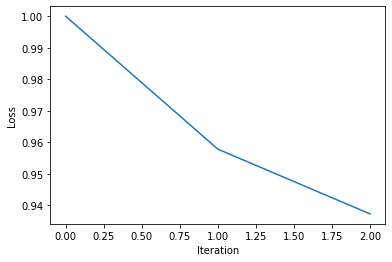

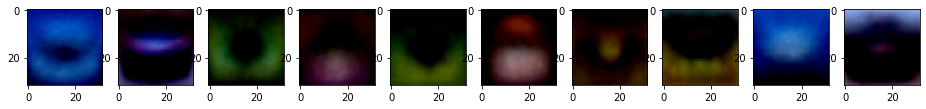

x_train -> (50000, 3072)
train_acc =  0.7055711111111111
train_loss =  0.9250013533536284
x_test -> (10000, 3072)
test_acc =  0.7107555555555556
test_loss =  0.9239030207625835


In [6]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
f, axarr = plt.subplots(1,10)
f.set_size_inches(16, 6)

for i in range(10):
    img = w1[:, i].reshape(32, 32, 3) # CIFAR10
    #img = w1[:, i].reshape(28, 28) # MNIST
    axarr[i].imshow(img*1000)
plt.show()

x_t = x_train
print("x_train ->", x_t.shape)
y_pred = x_t.dot(w1) + b1

train_acc = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1/(Ntr)*np.square(y_train - y_pred).sum()
print("train_acc = ", train_acc)
print("train_loss = ", train_loss)

x_t = x_test
print("x_test ->", x_t.shape)
y_pred= x_t.dot(w1) + b1

test_acc = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1/(Nte)*np.square(y_test - y_pred).sum()
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)